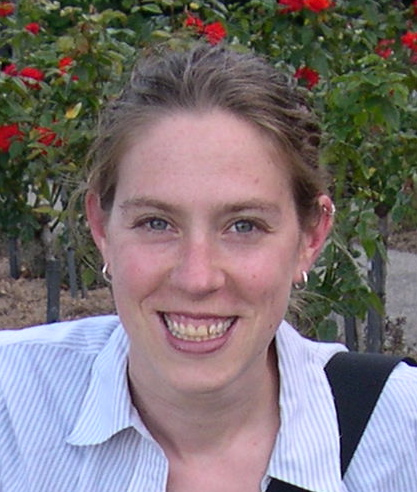

In [1]:
using Images, FileIO

img1 = load("img1.png")
img2 = load("img2.jpg")
img3 = load("img3.jpg")

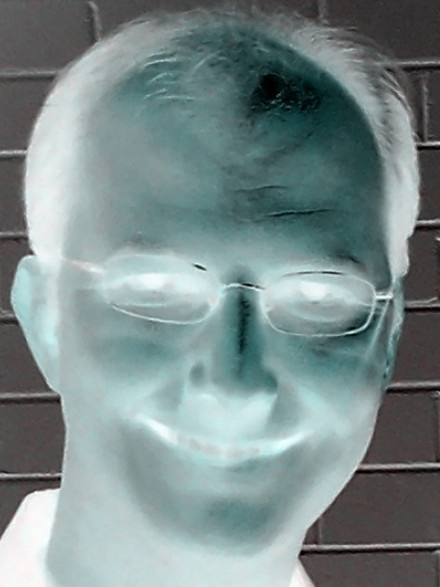

In [2]:
function invertpixel(pixel)
    newpixel = RGB(1-pixel.r, 1-pixel.g, 1-pixel.g)
    return newpixel
end

invert = image -> invertpixel.(image)

invert(copy(img2))


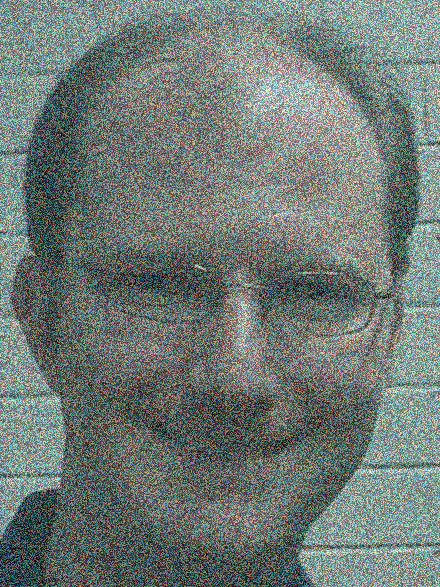

In [13]:


function addnoise(imag::Matrix{RGB{N0f8}})
    (h,w)   = size(image)
    colours = distinguishable_colors(10)
    ontop   = rand(colours,h,w)

    for i ∈ 1:h
        for j ∈ 1:w
            image[i,j] = ((image[i,j]./2 .+ ontop[i,j]./2))
        end
    end

    return(image)
end

addnoise(copy(img2))


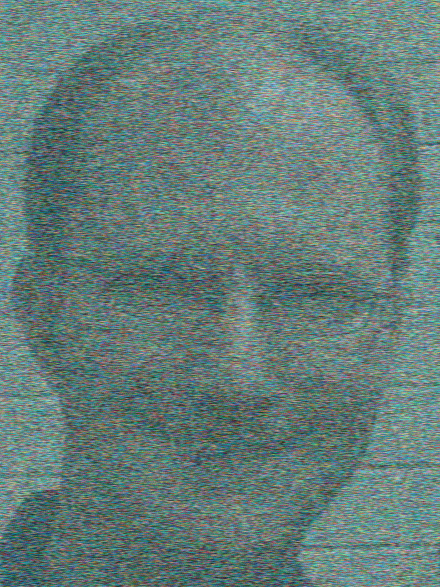

In [14]:
function posmod(in::Int,m::Int)
    if in > m
        return posmod(in-m,m)
    elseif in < 1
        return posmod(in+m,m)
    else
        return in
    end    
end

function horizblur(image::Matrix{RGB{N0f8}})
    (h,w) = size(image)

    for i ∈ 1:h
        for j ∈ 1:w
            image[i,j] = 0.2*image[i,j] + 0.2*image[i,posmod(j-1,w)] + 0.2*image[i,posmod(j+1,w)] + 0.2*image[i,posmod(j-2,w)] + 0.2*image[i,posmod(j+2,w)]
        end
    end
    return image
end

horizblur(addnoise(copy(img2)))

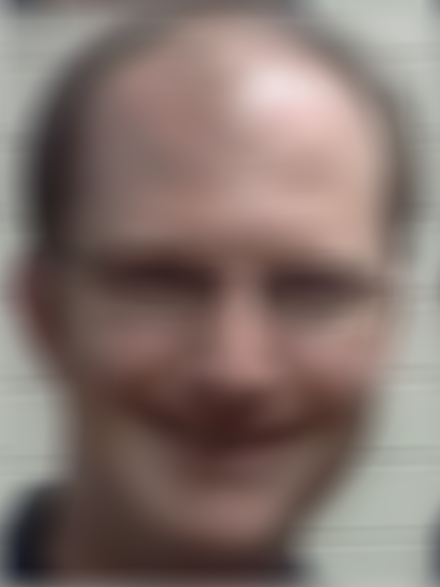

In [12]:


function moddedboxblur(image::Matrix{RGB{N0f8}},n::Int)
    k = 1/((2*n+1)^2)

    (h,w) = size(image)

    for i ∈ 1:h
        for j ∈ 1:w
            xs = (j-n):(j+n)
            ys = (i-n):(i+n)
            xs = map( x -> posmod(x,w), xs)
            ys = map( x -> posmod(x,h), ys)
            cum = RGB(0.0,0.0,0.0)
            for x in xs
                for y in ys
                    cum = cum + k*image[y,x]
                end
            end
            image[i,j] = cum
        end
    end
    return(image)
end

moddedboxblur(copy(img2),20)


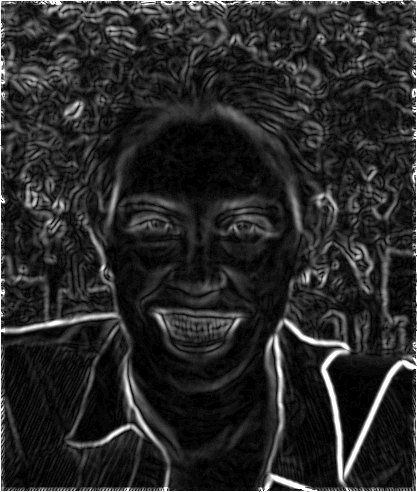

In [6]:
kernel = Kernel.gaussian((2,2))
sobel1 = Kernel.sobel()[1]
sobel2 = Kernel.sobel()[2]

function conv(a,b)
    acc = 0.0*b[1,1]
    (n,_) = size(a)
    for i ∈ 1:n
        for j ∈ 1:n
            acc = acc + a[i,j]*b[i,j]
        end
    end
    return abs.(acc)
end

function convolve(image, kernel)
    kernel = collect(kernel)
    (h,w) = size(image)
    (a,_) = size(kernel)
    n     = convert(Int64,(a-1)/2)    
    newimage = copy(image)
    for i ∈ 1:w
        for j ∈ 1:h

            if (1 <= (i-n)) && ((i+n) <= w) && (1 <= (j-n)) && ((j+n) <= h)
                t = (j-n)
                b = (j+n)
                l = (i-n)
                r = (i+n)
                newimage[j,i] =  conv( kernel, image[t:b,l:r] )
            end

            #add edge cases here

        end
    end
    return newimage
end

# 8*(convolve(copy(img3),sobel1) + convolve(copy(img3),sobel2) )

filter = convolve(copy(img3), kernel)
8*Gray.(convolve(filter,sobel1) + convolve(filter,sobel2) )

In [8]:
getred = (x) -> x.r # convert(Float64, x.r)
getgrn = (x) -> x.g # convert(Float64, x.g)
getblu = (x) -> x.b # convert(Float64, x.b)




#19 (generic function with 1 method)

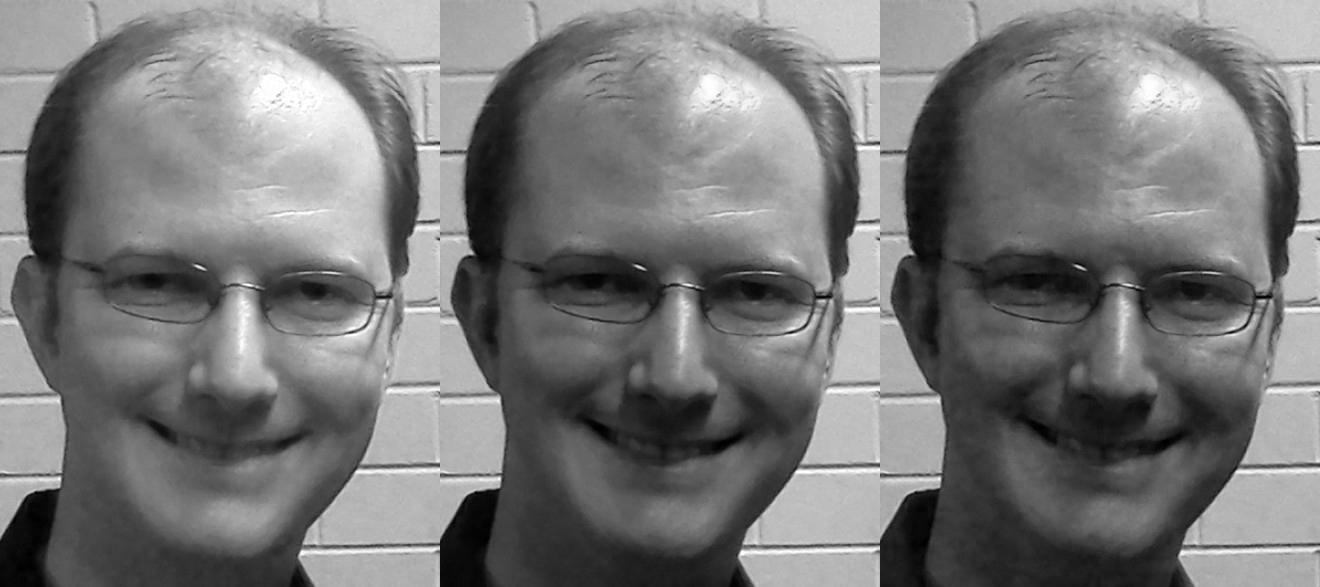

In [9]:
img1 = load("img1.png")
img2 = load("img2.jpg")
img3 = load("img3.jpg")

image = copy(img2)
red = getred.(image)
redim = map( (x) -> Gray(x), red)
grn = getgrn.(image)
grnim = map( (x) -> Gray(x), grn)
blu = getblu.(image)
bluim = map( (x) -> Gray(x), blu)

[redim grnim bluim]

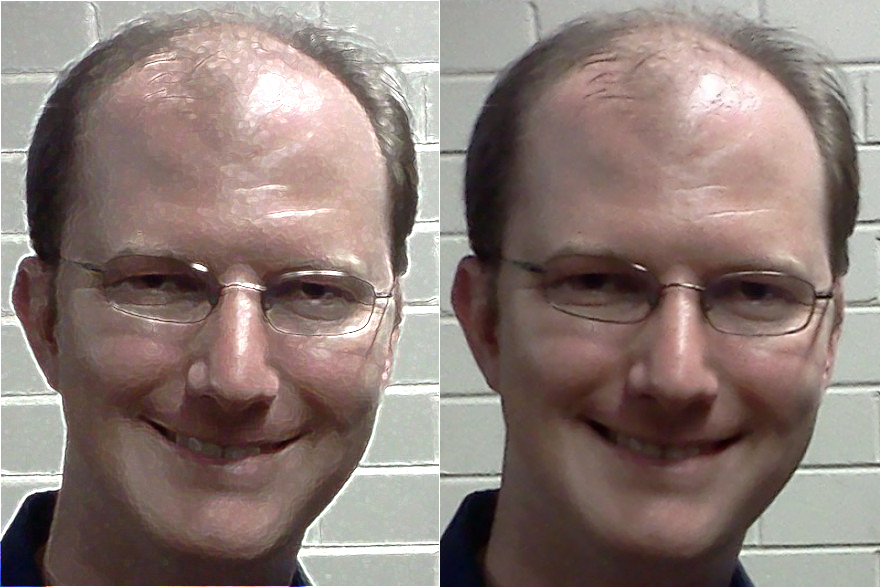

In [10]:
base = (copy(img2))
enhance1 = (convolve(copy(img2), sobel1))
enhance2 = (convolve(copy(img2), sobel2))
add = 3*enhance1 + 3*enhance2
final = base + (add)
[final img2]